# Exam 1
## DATA 301 Spring 2017

# Questions

## Imports

All of the packages you should need are imported in the cell below. Be sure to to run it before starting this exam. Feel free to import other packages as you see fit.

In [1]:
from symbulate import *

import numpy as np

import pandas as pd
pd.set_option("display.max_rows", 15)

import matplotlib.pyplot as plt

from altair import *

%matplotlib inline

## Question 1 (10 points)

Read in the data for 2010. The marathon times (in minutes) are stored in the column "official". The world record marathon time is 2:02:57, or about 123 minutes. Yet some of the times in this table are much less than 123 minutes.

Find all competitors with marathon times under 123 minutes. How many are there? Look up the names of some of these competitors on Google. Can you figure out why their marathon times are so unusually fast?

In [2]:
data10 = pd.read_csv("/data/marathon/2010.csv")
data10.head()

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
0,1 / 22,"Van Dyk, Ernst",Paarl,M,37,86.88,W1,1 / 29,NaN,1 / 24,NaN,RSA
1,3 / 4660,"Merga, Deriba",Addis Ababa,M,29,128.65,1,3 / 22672,NaN,3 / 13120,NaN,ETH
2,3 / 4996,"Kosgei, Salina",Eldoret,F,33,148.58,F1,58 / 22672,NaN,3 / 9552,NaN,KEN
3,2 / 22,"Schabort, Krige",Cedartown,M,46,86.93,W2,2 / 29,GA,2 / 24,NaN,USA
4,4 / 22,"Masazumi, Soejima",Fukuoka,M,39,88.10,W3,4 / 29,NaN,4 / 24,NaN,JPN


In [3]:
data10[data10["official"] < 123]

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
0,1 / 22,"Van Dyk, Ernst",Paarl,M,37,86.88,W1,1 / 29,NaN,1 / 24,NaN,RSA
3,2 / 22,"Schabort, Krige",Cedartown,M,46,86.93,W2,2 / 29,GA,2 / 24,NaN,USA
4,4 / 22,"Masazumi, Soejima",Fukuoka,M,39,88.10,W3,4 / 29,NaN,4 / 24,NaN,JPN
7,5 / 22,"Puigbo, Roger",Sant Julia De Vilatorta,M,32,88.42,W4,5 / 29,NaN,5 / 24,NaN,ESP
10,6 / 22,"Botello Jimenez, Rafael",Manlleu (BCN),M,31,91.20,W6,6 / 29,NaN,6 / 24,NaN,ESP
13,7 / 22,"Madera, Jorge",Granollers,M,30,93.13,W7,7 / 29,NaN,7 / 24,NaN,ESP
16,3 / 22,"Hokinoue, Kota",Iizuka,M,36,87.08,W8,3 / 29,NaN,3 / 24,NaN,JPN
...,...,...,...,...,...,...,...,...,...,...,...,...
127,5 / 17,"Murphy, Michael G.",Mclean,M,24,108.90,203,5 / 20,VA,5 / 17,NaN,USA
129,3 / 17,"Corral, Ricardo V. PhD.",Bronx,M,49,99.82,205,3 / 20,NY,3 / 17,NaN,USA


In [4]:
data10[data10["official"] < 123]["division"]

0      1        / 22
3      2        / 22
4      4        / 22
7      5        / 22
10     6        / 22
13     7        / 22
16     3        / 22
           ...      
127    5        / 17
129    3        / 17
130    9        / 17
131    6        / 17
135    8        / 17
140    7        / 17
142    4        / 17
Name: division, dtype: object

There are 33 runners with official times less than 123 minutes. After doing some research on some of the names returned in this dataset, it appears the extremely low times are all from competitors in the wheelchair portion of the Boston Marathon. After further research, I also concluded that the runners with time closer to 123 but still faster were all competing in the handcycle portion of the event. Becuase they are competing in wheelchairs/handcycles and not running, their times are much faster than those of the runners.

## Question 2 (10 points)

Let's restrict our analysis to runners only. Of course, this means that we have to remove not only the competitors that we identified in Question 1, but also other competitors like them.

Look closely at the 2010 data set. Do you see anything in the data set that will allow you to identify the non-runners? Write code to remove the non-runners from the data set.

From the previous question and my own research, I concluded that the only non-runner divisions in the marathon are wheelchairs and handcycles. In order to restrict our dataset to runners only, I will remove all runners in those respective divisions, which I have concluded are 22 and 17.

In [5]:
data10_Run = data10[data10["division"].str.contains("/ 17")==False]
data10_Run = data10_Run[data10_Run["division"].str.contains("/ 22")==False]
data10_Run

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
1,3 / 4660,"Merga, Deriba",Addis Ababa,M,29,128.65,1,3 / 22672,NaN,3 / 13120,NaN,ETH
2,3 / 4996,"Kosgei, Salina",Eldoret,F,33,148.58,F1,58 / 22672,NaN,3 / 9552,NaN,KEN
5,4 / 4660,"Hall, Ryan",Mammoth Lakes,M,27,128.68,3,4 / 22672,CA,4 / 13120,NaN,USA
6,14 / 4996,"Perez, Madai",Tlaxcala,F,30,156.07,F3,136 / 22672,NaN,14 / 9552,NaN,MEX
8,1 / 4996,"Erkesso, Teyba",Arsi,F,27,146.18,F4,42 / 22672,NaN,1 / 9552,NaN,ETH
9,21 / 4660,"Yegon, Gilbert",Eldoret,M,21,141.20,5,22 / 22672,NaN,22 / 13120,NaN,KEN
11,1 / 4660,"Cheruiyot, Robert Kiprono",Bomet,M,21,125.87,6,1 / 22672,NaN,1 / 13120,NaN,KEN
...,...,...,...,...,...,...,...,...,...,...,...,...
22712,3391 / 4660,"Walton, Myles A.",Wellesley,M,34,226.25,27806,11913 / 22672,MA,8308 / 13120,NaN,USA
22713,1566 / 1692,"Sullivan, Patricia A.",Hanover,F,43,286.20,27807,20726 / 22672,MA,8578 / 9552,NaN,USA


## Question 3 (10 points)

In August 2012, Vice-Presidential candidate Paul Ryan claimed that he had run a marathon in "under three [hours], high twos. I had a two hour and fifty-something."

- Make a histogram showing the distribution of **men's** marathon times in the 2010 Boston Marathon.
- If Ryan had indeed run a marathon in under 3 hours, what percentile would that have put him at among all **male** runners in the 2010 Boston Marathon?
- It turns out that Ryan actually ran the marathon in 4:01:25. What percentile would that have put him at among all **male** runners in the 2010 Boston Marathon?

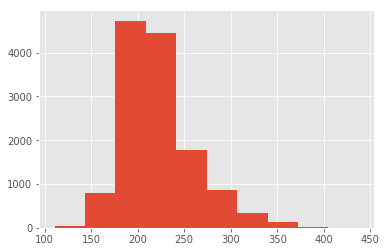

In [6]:
dataMen = data10_Run[data10_Run["gender"] == "M"]
ManTimes = dataMen["official"].hist()
ManTimes

In [7]:
len(dataMen[dataMen['official'] < 180])/(len(dataMen))

0.09702004420394787

In [8]:
len(dataMen[dataMen['official'] <= 241])/(len(dataMen))

0.7596981937352336

If Ryan had truly run the marathon in under three hours, it would have put him within the 10th percentile of all male runners in the 2010 Boston Marathon (9.7 to be exact). His true time of 4:01:25 actually put him within the 75th percentile of all male runner in the 2010 Boston Marathon (76 to be exact).

## Question 4 (10 points)

How does marathon time vary with age? **For female runners only**, calculate the mean marathon time by age, as well as the standard error of this mean. Create a graphic that communicates this information. (You may use either Matplotlib or Altair.)

In [9]:
dataFem = data10_Run[data10_Run["gender"] == "F"]
dataFem.head()

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
2,3 / 4996,"Kosgei, Salina",Eldoret,F,33,148.58,F1,58 / 22672,NaN,3 / 9552,NaN,KEN
6,14 / 4996,"Perez, Madai",Tlaxcala,F,30,156.07,F3,136 / 22672,NaN,14 / 9552,NaN,MEX
8,1 / 4996,"Erkesso, Teyba",Arsi,F,27,146.18,F4,42 / 22672,NaN,1 / 9552,NaN,ETH
12,6 / 4996,"Grigoryeva, Lidiya",Cheboksary,F,36,150.52,F6,81 / 22672,NaN,6 / 9552,NaN,RUS
14,5 / 4996,"Genovese, Bruna",Volpago del Montello,F,33,149.20,F7,67 / 22672,NaN,5 / 9552,NaN,ITA


In [10]:
meanTimes = dataFem.groupby('age')['official'].mean()

grouped_times = dataFem.groupby('age')['official']
n = grouped_times.count()
sd = grouped_times.std()

std_err = (sd/np.sqrt(n))

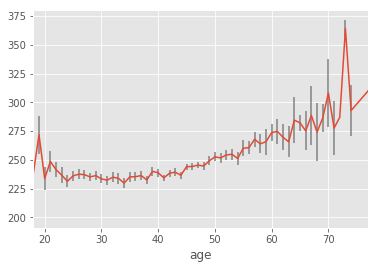

In [11]:
meanTimes.plot.line(yerr=2*std_err, ecolor='grey')

## Question 5 (10 points)

Read in the 2015 results. The 2015 data only contains results for runners, so you do not have to do the same cleaning that you did for the 2010 data. 

Notice that the 2015 data contains not only each runner's overall time (in the column "Official Time"), but also the time that each runner reached the 5K, 10K, 15K, 20K, Half, 25K, 30K, 35K, and 40K marks. (A marathon is 42.2K.)

Unfortunately, the times are represented by a string in hours:minutes:seconds (`"%H:%M:%S"`) format, instead of in minutes, as before. Convert the times in each of these columns to a number representing the time in minutes.

In [12]:
data15 = pd.read_csv("/data/marathon/2015.csv")
data15.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [18]:
def toMinutes(nums):
    try:
        hr = float(nums[0])*60
        mins = float(nums[1])
        sec = float(nums[2])/60
        return hr+mins+sec
    except ValueError:
        return 0

hms = data15['5K'].str.split(':', expand=True)
data15['5K'] = (60*pd.to_numeric(hms[0], errors='coerce') + 
                pd.to_numeric(hms[1], errors='coerce') + 
                pd.to_numeric(hms[2], errors='coerce')/60)

data15['5K']

0        14.716667
1        14.716667
2        14.716667
3        14.716667
4        14.716667
5        14.733333
6        14.750000
           ...    
26591    39.866667
26592    37.966667
26593    50.250000
26594    48.600000
26595    53.050000
26596    49.066667
26597    40.233333
Name: 5K, dtype: float64

In [ ]:
data15.head()

In [ ]:
## Clear 0 values from previous problem, assuming these runners did not participate in the race.
data15 = data15[((data15['10K']==0.0)==False) & 
               ((data15['15K']==0.0)==False) & 
               ((data15['20K']==0.0)==False) & 
               ((data15['Half']==0.0)==False) & 
               ((data15['25K']==0.0)==False) & 
               ((data15['30K']==0.0)==False) & 
               ((data15['35K']==0.0)==False) & 
               ((data15['40K']==0.0)==False)]

# Question 6
** I accidentally deleted the question but remember what it was, output is below

If we assumed runners paced themselves evenly, we would expect the average difference between times for the first 10K and second 10K to be 0.

In [ ]:
data15 = pd.read_csv("/data/marathon/2015_clean.csv")
diffs = data15['20K'] - data15['10K']
meandiff = diffs.mean()
n = diffs.count()
sd = diffs.std()

std_err = (sd/np.sqrt(n))
std_err, meandiff

In [ ]:
model = Normal(mean=0, sd=std_err)
simDiffs = RV(model)
sims = simDiffs.sim(5000)
sims.plot()

In [ ]:
sims.count_geq(meandiff)

If we assume runners pace themselves evenly throughout the race, we have to accept that a 0 in 5000 event just occured (impossible). Therefore, with our small p-value of 0, we can conclude that on average, runners do not truly pace themselves evenly throughout the first and second 10K.

## Question 7 (10 points)

Let's look at how people's marathon times changed between 2010 and 2015. To do this, we need to identify runners who competed in both the 2010 and 2015 marathons.

One way to do this is to inner join the two data sets on the _name_ of the runner. What potential **major problem** do you see with this approach? Then, write code to check whether this is a problem for this data set and summarize your findings.

_EXPLAIN THE POTENTIAL PROBLEM HERE._

In [ ]:
data15 = pd.read_csv("/data/marathon/2015_clean.csv")
data10 = pd.read_csv("/data/marathon/2010.csv")
data10.head()

In [ ]:
data10["Name"] = data10["name"]
data10 = data10.drop("name", axis=1)

In [ ]:
data_merged = data15.merge(data10, how='inner', on=["Name"])
data_merged.head()

The underlying issue was that the "name" column for the 2015 data was capitalized but it was not capitalized for 2010. To resolve this issue, I made a new column in 2010 with a capitalzed title "Name" and then removed the original, non-capital column. After this, merging was successful.

## Question 8 (10 points)

Construct a data frame consisting only of people who ran in both the 2010 and 2015 marathons. (You'll need some way to deal with the problem you identified in Question 7.)

- What percentage of people ran the marathon faster in 2015 than in 2010?
- Make a plot showing the percentage of people who ran faster in 2015 _as a function of their age (in 2010)_. Summarize the trend that you see.

In [ ]:
data_merged = data_merged[((data_merged['official']==0)==False) & ((data_merged['Official Time']==0)==False)]

In [ ]:
len(data_merged[data_merged['official']<data_merged['Official Time']])/len(data_merged)

In [ ]:
dataFaster = data_merged[data_merged['official']<data_merged['Official Time']]
Chart(dataFaster), mark_circle(), encode(
    x='age',
    y='Official Time')

63.7% of runners ran the marathon faster in 2015 than in 2010.